In [2]:
import os
import sys
import logging
import cv2
import json
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from ast import literal_eval
from tqdm import tqdm_notebook as tqdm
import numpy as np
import pickle


%matplotlib inline
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('TestClassifier')

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from vehicle_detector import main

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [4]:
with open('../data/filtered_images_path.json', 'r') as fp:
    data = json.load(fp)

vehicle_images_path = data['vehicle_images']
non_vehicle_images_path = data['non_vehicle_images']

In [18]:
def show_n_m_grid(data, cmap='gray', rows=4, cols=2, axis='off', image=True):
    f, axes = plt.subplots(rows, cols, squeeze=False, figsize=(cols*4, rows*4))
    f.tight_layout()
    
    for idx, datum in enumerate(data):
        row = idx // cols
        col = idx % cols
        if axis=='off':
            axes[row, col].axis('off')
        if image==True:
            axes[row, col].imshow(datum, cmap=cmap, aspect="auto")
        else:
#             axes[row, col].plot(datum)
            axes[row, col].bar(np.arange(len(datum)), datum)
            
def cvt_bgr_rgb(img, cv_to_mpimg=True):
    flag = cv2.COLOR_BGR2RGB
    if not cv_to_mpimg:  # convert from mpimg to cv
        flag = cv2.COLOR_RGB2BGR
    return cv2.cvtColor(img, flag)

In [6]:
from vehicle_detector.descriptors import HOG, color_hist
hog = HOG(12, (16, 16), (4,4))

In [46]:
image_paths = [vehicle_images_path[i] for  i in [100, 200, 300]]
# images = [cv2.cvtColor(cv2.imread(vehicle_images_path[i]), cv2.COLOR_BGR2YCrCb) for i in [100, 200, 300]]

image_paths.extend([non_vehicle_images_path[i] for  i in [100, 200, 300]])
color_images = [cv2.imread(i) for i in image_paths]
images = [cv2.cvtColor(i, cv2.COLOR_BGR2YCrCb) for i in color_images]
color_features = [color_hist(x) for x in images]
hog_images = [hog.get_features(i, vis=True)[1] for i in images]
hog_single_images = [np.mean(np.array([i[0], i[1], i[2]]), axis=0) for i in hog_images]

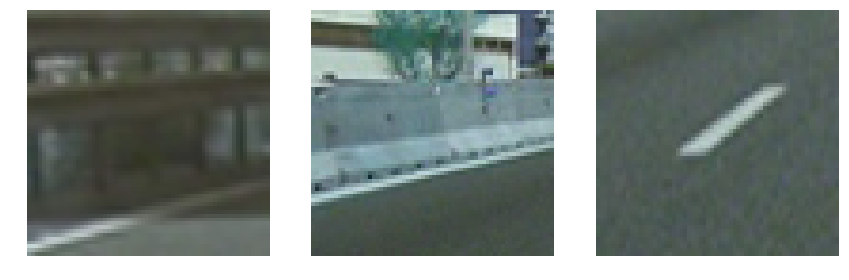

In [58]:
start = 3
stop = 6
show_n_m_grid(color_images[start:stop], axis='off', rows = 1, cols=3)
# show_n_m_grid(color_features[start:stop], axis='on', rows = 1, cols=3, image=False)
# show_n_m_grid(color_images[start:stop], axis='off', rows = 1, cols=3)


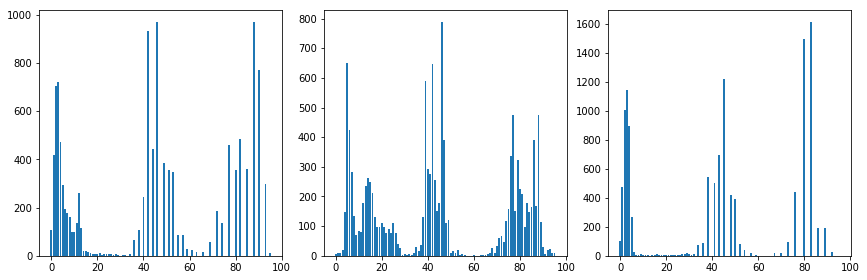

In [59]:
show_n_m_grid(color_features[start:stop], axis='on', rows = 1, cols=3, image=False)

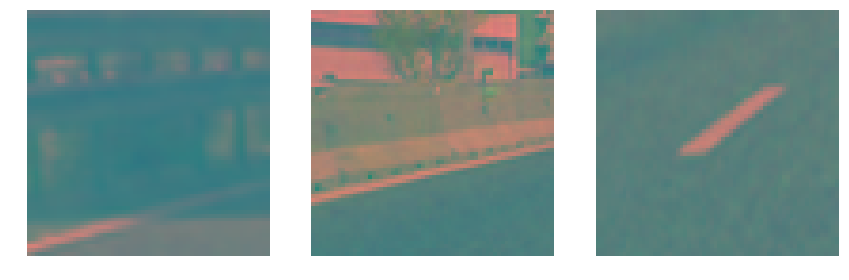

In [60]:
show_n_m_grid(images[start:stop], axis='off', rows = 1, cols=3)

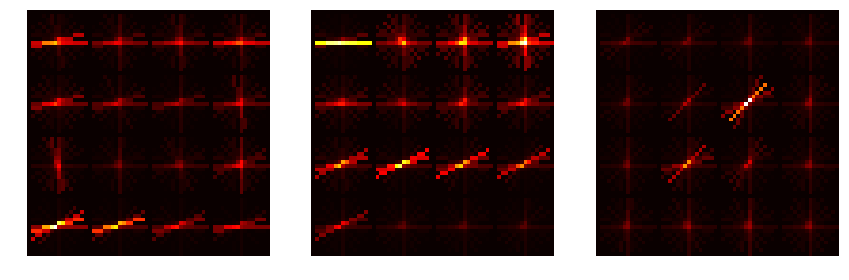

In [61]:
show_n_m_grid(hog_single_images[start:stop], cmap='hot', axis='off', rows = 1, cols=3)